머신러닝 모델링의 '마지막 관문'이자, 초보와 고수를 가르는 가장 결정적인 기준점인 '교차 검증(Cross Validation)'과 '하이퍼파라미터 튜닝(Hyperparameter Tuning)'을 다룬다.

지금까지 우리는 좋은 알고리즘을 선택하고 데이터를 학습시키는 법을 배웠다. 하지만 "이 모델이 진짜 현장에서 쓸 수 있는 물건인가?"를 검증하고, "이 모델의 성능을 1%라도 더 끌어올릴 방법은 없는가?"를 고민하는 과정이 없다면, 그 모델은 실험실 속의 장난감에 불과하다.

이 시간의 핵심은 "내 모델의 점수가 운이 좋아서 잘 나온 것인지, 진짜 실력인지 검증하는 철학"과 "기계의 성능을 극한으로 쥐어짜기 위해 인간이 세팅해줘야 하는 최적의 설정값을 찾는 전략"을 배우는 것이다. 헬스케어 데이터는 생명을 다루기에 '신뢰성'이 무엇보다 중요하며, 이 신뢰성은 바로 여기서 나온다.

---

# 📘 [3차] 6.1. 교차 검증과 하이퍼파라미터 튜닝: 신뢰할 수 있는 모델 만들기

## 1. "한 번의 시험 점수를 믿을 수 있는가?": 교차 검증의 철학

### 1) 홀드아웃(Hold-out) 방식의 불안함
지금까지 우리는 데이터를 `Train(학습용)`과 `Test(평가용)` 두 덩어리로 딱 한 번 나누어서 사용했다. 이를 홀드아웃(Hold-out) 기법이라고 한다.
*   학습용(80%): 열심히 공부했다.
*   평가용(20%): 시험을 봤다. 정확도가 95%가 나왔다.

우리는 이 95%라는 숫자를 보고 환호하며 "우리 모델은 95점짜리야!"라고 확신했다. 하지만 과연 그럴까? 헬스케어 데이터는 샘플 수(환자 수)가 적고 개인별 편차가 매우 크다. 여기서 '운(Luck)'이라는 요소가 개입한다.

*   운이 좋은 경우 (Lucky): 하필이면 `Test` 데이터에 증상이 아주 전형적이고 맞추기 쉬운 환자들만 뽑혔다면? 실제 실력은 70점인데 점수만 95점이 나올 수 있다. (과대평가)
*   운이 나쁜 경우 (Unlucky): 하필이면 `Test` 데이터에 아주 특이한 희귀 케이스나 노이즈가 많은 환자들만 몰려 있다면? 실제 실력은 90점인데 점수는 60점이 나올 수 있다. (과소평가)

즉, 데이터를 어떻게 자르느냐에 따라 성능이 널뛰기를 한다면, 우리는 이 모델을 믿고 환자에게 적용할 수 없다. 의사에게 "이 AI는 운 좋으면 잘 맞추고 운 나쁘면 못 맞춥니다"라고 말할 수는 없기 때문이다. 우리는 '통계적으로 신뢰할 수 있는 점수'가 필요하다.

### 2) K-겹 교차 검증 (K-Fold Cross Validation): 모의고사를 여러 번 보자
이 문제를 해결하기 위해 고안된 방법이 교차 검증이다. 쉽게 말해, 시험을 한 번만 보는 게 아니라 여러 번 봐서 평균을 내는 것이다.

가장 널리 쓰이는 5-겹(5-Fold) 교차 검증을 예로 들어 과정을 상세히 살펴보자.
1.  전체 데이터를 5개의 조각(Fold)으로 등분한다. (조각 1, 2, 3, 4, 5)
2.  1회차 시험: '조각 1'을 시험지(Test)로 쓰고, 나머지 '조각 2~5'를 교과서(Train)로 써서 공부한다. $\rightarrow$ 점수 A 기록.
3.  2회차 시험: 이번엔 '조각 2'를 시험지로 쓰고, 나머지(1, 3~5)로 공부한다. $\rightarrow$ 점수 B 기록.
4.  3회차 시험: '조각 3'이 시험지가 된다. $\rightarrow$ 점수 C 기록.
5.  ... 이렇게 총 5번의 시험을 치른다.
6.  모든 데이터가 한 번씩은 반드시 시험지 역할을 하게 된다.

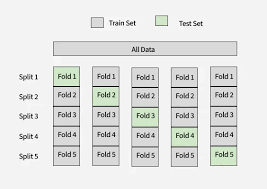

### 3) 교차 검증이 주는 확신: 신뢰구간
5번의 시험 결과가 `[92점, 94점, 91점, 93점, 95점]`으로 나왔다고 치자.
*   평균 점수: 93점. 이것이 모델의 '진짜 실력'에 가장 가까운 값이다.
*   편차: 점수들이 91~95 사이에서 움직인다.
이제 우리는 의사에게 이렇게 말할 수 있다.
> "이 모델의 정확도는 평균 93%이며, 최악의 경우에도 91% 이상의 성능을 보장합니다."

이것이 바로 통계적 '신뢰성(Reliability)'이다. 헬스케어 AI가 FDA 인허가를 받거나 논문에 실리기 위해서는, 단순한 최고 점수(Best Score)가 아니라 이 교차 검증된 평균 점수와 편차(표준편차)를 제시해야만 한다.

### 4) 계층적 교차 검증 (Stratified K-Fold)
헬스케어 데이터에서 교차 검증을 할 때 반드시 주의해야 할 점이 있다. 바로 '데이터 불균형'이다.
암 환자가 전체의 10%밖에 없는데, 데이터를 무작위로 5등분 했다고 치자. 운이 나쁘면 '조각 1'에는 암 환자가 한 명도 안 들어갈 수도 있다. 그러면 1회차 시험은 암 환자를 한 명도 못 본 상태로 평가를 하게 되니 의미가 없다.

이를 방지하기 위해 Stratified K-Fold를 사용한다.
*   이 방식은 데이터를 나눌 때, 전체 데이터의 정답 비율(암 10% : 정상 90%)을 확인한다.
*   그리고 5개의 조각 각각에도 똑같이 암 환자가 10%씩 들어가도록 강제로 비율을 맞춰서 나눈다.
*   분류(Classification) 문제, 특히 의료 데이터를 다룰 때는 선택이 아니라 필수다.

---

## 2. "누가 이 기계를 조종하는가?": 파라미터 vs 하이퍼파라미터

모델의 성능을 검증하는 법을 알았으니, 이제 성능을 높이는 법을 알아볼 차례다. 여기서 머신러닝의 변수를 두 가지로 명확히 구분해야 한다.

### 1) 파라미터 (Parameter, 매개변수): 기계가 배우는 것
*   정의: 모델이 학습 과정에서 데이터로부터 스스로 찾아내는 값이다.
*   예시: 선형 회귀의 가중치($w$)와 절편($b$), 의사결정나무의 분기 기준값(혈당 126 등).
*   특징: 사람이 손댈 수 없다. 우리가 `fit()`을 실행하면 기계가 알아서 최적의 값을 계산해낸다. 이것이 기계의 '지식'이다.

### 2) 하이퍼파라미터 (Hyperparameter, 초매개변수): 사람이 정해주는 것
*   정의: 학습을 시작하기 전에 사람이 미리 세팅해줘야 하는 설정값이다.
*   비유: 라디오를 듣는 상황을 생각해보자.
    *   라디오 전파(데이터)가 와서 소리로 바뀌는 과정은 기계 내부의 부품(파라미터)이 알아서 한다.
    *   하지만 볼륨을 몇으로 할지, 주파수를 어디에 맞출지, 베이스(Bass)를 높일지는 사용자(사람)가 다이얼을 돌려서 정해야 한다. 이 다이얼이 바로 하이퍼파라미터다.
*   예시:
    *   KNN: 이웃을 몇 명 볼 것인가? ($K=3$ vs $K=10$)
    *   의사결정나무: 나무의 깊이를 어디까지 허용할 것인가? (`max_depth`)
    *   릿지/라쏘: 규제를 얼마나 세게 걸 것인가? (`alpha`)
    *   랜덤 포레스트: 나무를 몇 그루 심을 것인가? (`n_estimators`)

### 3) 튜닝(Tuning)의 난제
문제는 "도대체 몇으로 설정해야 성능이 제일 좋은지 아무도 모른다"는 것이다.
*   나무를 100그루 심는 게 좋을까, 500그루 심는 게 좋을까?
*   규제를 0.1로 하는 게 좋을까, 10으로 하는 게 좋을까?
정답은 없다. 데이터마다 다르다. 그래서 우리는 최적의 설정값을 찾기 위해 수많은 실험을 해야 한다. 이 과정을 '하이퍼파라미터 튜닝'이라고 한다.

---

## 3. 최적의 세팅을 찾는 탐험가들: 그리드 서치 vs 랜덤 서치

최적의 하이퍼파라미터 조합을 찾는 것은 마치 자물쇠의 비밀번호를 맞추는 것과 같다. 두 가지 대표적인 전략이 있다.

### 1) 그리드 서치 (Grid Search): 꼼꼼한 완벽주의자
*   방식: 우리가 궁금한 값들을 표(Grid)처럼 촘촘하게 짠다. 그리고 "모든 경우의 수"를 다 시도해본다.
    *   나무 개수 후보: [10, 50, 100] (3개)
    *   나무 깊이 후보: [3, 5, 7, 10] (4개)
    *   총 조합: $3 \times 4 = 12$가지.
    *   여기에 교차 검증(5-Fold)까지 한다면? $12 \times 5 = 60$번의 학습과 평가를 반복한다.
*   장점: 우리가 지정한 범위 안에서는 무조건 최고의 조합(Best Parameter)을 찾아낸다. 놓치는 게 없다.
*   단점: 시간이 너무 오래 걸린다. 파라미터가 3개, 4개로 늘어나면 조합의 수는 기하급수적으로 폭발한다. (차원의 저주와 비슷하다)

### 2) 랜덤 서치 (Random Search): 효율적인 탐험가
*   방식: 일일이 다 해보지 않고, "무작위로 찍어서" 시도해본다.
    *   나무 개수: 10~500 사이에서 랜덤.
    *   나무 깊이: 3~20 사이에서 랜덤.
    *   "이 범위 안에서 아무거나 랜덤하게 100번만 뽑아서 실험해봐."
*   장점:
    *   효율성: 그리드 서치보다 훨씬 적은 횟수로도 꽤 훌륭한 성능을 낸다.
    *   이유: 사실 머신러닝 성능에 영향을 미치는 중요 파라미터는 한두 개뿐인 경우가 많다. 그리드 서치는 중요하지 않은 파라미터를 바꾸느라 시간을 낭비하지만, 랜덤 서치는 중요한 파라미터를 다양하게 탐색할 확률이 더 높다.
*   현업의 선택: 파라미터가 적으면 그리드 서치를 쓰지만, 딥러닝이나 XGBoost처럼 튜닝할 게 많은 복잡한 모델은 랜덤 서치를 먼저 돌려서 대략적인 범위를 찾고, 그 후에 미세하게 그리드 서치를 하는 것이 정석이다.

---

## 4. 검증 세트(Validation Set)의 역할: 컨닝 방지 위원회

튜닝을 할 때 초심자가 저지르는 가장 큰 범죄(?)는 "테스트 데이터(Test Set)를 튜닝에 사용하는 것"이다.

### 1) 시험지로 공부하면 안 된다
*   상황: 모델을 튜닝한다. 파라미터를 바꾸고 `Test Set`으로 점수를 매겨봤더니 80점이다. 또 바꿔서 매겨보니 82점이다. 이걸 반복해서 90점까지 올렸다.
*   문제: 이 모델은 `Test Set`에 맞춰서 튜닝되었다. 즉, `Test Set`의 정답 패턴을 간접적으로 본 것이다. 이것은 수능 시험지를 훔쳐보고 공부해서 100점을 맞은 것과 같다. 이 모델을 현실 세계(새로운 환자)에 내놓으면 점수가 폭락한다. 이것도 일종의 과적합(Overfitting)이다.

### 2) 데이터를 3등분 하라: Train / Validation / Test
그래서 우리는 데이터를 세 덩어리로 나눠야 한다.
1.  Train Set (학습용): 교과서. 모델이 학습할 때 쓴다. (파라미터 학습)
2.  Validation Set (검증용): 모의고사. 하이퍼파라미터를 튜닝할 때 성능 평가용으로 쓴다. 이 점수가 잘 나오도록 세팅을 맞춘다.
3.  Test Set (평가용): 수능. 모든 튜닝이 끝나고 최종 모델이 확정되었을 때, 딱 한 번만 사용한다. 여기서 나온 점수가 진짜 최종 성적이다.

### 3) 교차 검증의 역할
데이터가 충분히 많으면 3등분을 하면 된다. 하지만 헬스케어 데이터는 귀하다. `Validation Set`으로 따로 떼어놓는 것조차 아깝다.
이때 교차 검증(Cross Validation)이 빛을 발한다. 별도의 검증 세트를 떼어놓지 않아도, `Train Set` 내부에서 조각을 돌려가며 검증(Validation) 역할을 수행하게 한다. 즉, 데이터를 낭비하지 않으면서도 안전하게 튜닝을 할 수 있게 해준다.

---

## 5. 요약:

1.  신뢰성 확보: 데이터 분할의 우연성에 속지 않기 위해 교차 검증(Cross Validation)을 수행하여 평균적인 성능과 편차를 확인해야 한다.
2.  계층적 분할 (Stratified): 환자 비율이 불균형한 의료 데이터에서는 반드시 비율을 유지하며 나누는 `Stratified K-Fold`를 사용해야 한다.
3.  하이퍼파라미터 튜닝: 사람이 설정해줘야 하는 값(설정 노브)을 최적화하여 모델 성능을 극대화하는 과정이다.
4.  탐색 전략:
    *   그리드 서치: 모든 조합을 다 해본다. 꼼꼼하지만 느리다.
    *   랜덤 서치: 무작위로 찍어본다. 빠르고 효율적이다.
5.  데이터 누수 방지: 튜닝 과정에서 테스트 데이터를 사용하면 안 된다. 교차 검증을 통해 `Train` 데이터 내에서 검증을 해결하거나, 별도의 `Validation` 세트를 써야 한다.

이 개념들은 머신러닝 프로젝트의 '마무리 투수'와 같다. 아무리 좋은 알고리즘을 써도 검증이 잘못되면 프로젝트는 실패한다.

## 6.2. \[예제 1\] 교차 검증의 기초: 점수가 들쑥날쑥하다?

K-Fold 교차 검증을 직접 수행해보고, 데이터 조각(Fold)마다 점수가 어떻게
달라지는지 확인한다.

상황: 붓꽃 데이터셋으로 의사결정나무 모델을 검증한다.

``` python
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# 1. 데이터 로드
iris = load_iris()
X, y = iris.data, iris.target

# 2. 모델 생성
dt = DecisionTreeClassifier(random_state=42)

# 3. K-Fold 객체 생성 (5등분)
# shuffle=True: 데이터를 섞어서 나눈다 (순서에 의한 편향 방지)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# 4. 교차 검증 수행
# scoring='accuracy': 평가지표는 정확도
scores = cross_val_score(dt, X, y, cv=kfold, scoring='accuracy')

print("=== 교차 검증 결과 ===")
print(f"각 Fold별 정확도: {np.round(scores, 4)}")
print(f"평균 정확도: {np.mean(scores):.4f}")
print(f"표준 편차:   {np.std(scores):.4f}")

# 설명:
# 결과가 [1.0, 0.96, 0.93, ...] 처럼 다르게 나온다.
# 만약 한 번만 테스트했다면 100점이라고 착각하거나, 93점이라고 과소평가했을 것이다.
# 평균 점수가 이 모델의 진짜 실력이다.
```


> 📖 가이드
>
> 교차 검증(Cross Validation)이 왜 필요한지 직접 확인합니다.
> - K-Fold: 데이터를 5조각(Fold)으로 나누고, 돌아가면서 시험을 5번 봅니다.
> - 결과: 점수가 [1.0, 0.96, 0.93...] 처럼 들쑥날쑥하다면, 한 번의 시험 결과만 믿는 것이 얼마나 위험한지 알 수 있습니다.
> - 신뢰성: 5번의 평균 점수가 진짜 내 모델의 실력입니다.



In [ ]:
# do write code


## 6.3. \[예제 2\] 헬스케어 필수템: Stratified K-Fold

환자 데이터는 불균형하다(암 환자 10%, 정상 90%). 그냥 K-Fold로 나누면,
운 나쁘게 어떤 조각에는 환자가 한 명도 없을 수 있다. 이를 방지하기 위해
비율을 유지하며 나누는 Stratified K-Fold를 사용한다.

상황: 불균형 데이터에서 일반 K-Fold와 Stratified K-Fold의 차이 비교.

``` python
from sklearn.model_selection import StratifiedKFold

# 1. 불균형 데이터 가정 (y에 0이 90개, 1이 10개라고 치자)
# 여기서는 iris 데이터(클래스별 50개 균형)를 쓰지만 로직을 이해한다.

# 2. Stratified K-Fold 객체 생성
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 3. 교차 검증 수행
scores_strat = cross_val_score(dt, X, y, cv=skf, scoring='accuracy')

print("=== Stratified K-Fold 결과 ===")
print(f"각 Fold별 정확도: {np.round(scores_strat, 4)}")
print(f"평균 정확도: {np.mean(scores_strat):.4f}")

# 설명:
# 분류(Classification) 문제, 특히 의료 데이터에서는 무조건 Stratified K-Fold를 쓰는 것이 원칙이다.
# 각 Fold마다 환자와 정상인의 비율을 원본과 똑같이 맞춰준다.
```


> 📖 가이드
>
> 헬스케어 데이터에서 필수적인 Stratified K-Fold를 배웁니다.
> - 문제점: 암 환자가 10%뿐인데, 랜덤으로 나누다가 어떤 조각에 암 환자가 한 명도 없게 되면 검증이 제대로 안 됩니다.
> - 해결책: Stratified(계층적) 분할은 원본 데이터의 암 환자 비율(10%)을 모든 조각에서도 똑같이 유지해줍니다.



In [2]:
# do write code
from sklearn.model_selection import StratifiedKFold

# 1. 불균형 데이터 가정 (y에 0이 90개, 1이 10개라고 치자)
# 여기서는 iris 데이터(클래스별 50개 균형)를 쓰지만 로직을 이해한다.

# 2. Stratified K-Fold 객체 생성
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 3. 교차 검증 수행
scores_strat = cross_val_score(dt, X, y, cv=skf, scoring='accuracy')

print("=== Stratified K-Fold 결과 ===")
print(f"각 Fold별 정확도: {np.round(scores_strat, 4)}")
print(f"평균 정확도: {np.mean(scores_strat):.4f}")

=== Stratified K-Fold 결과 ===
각 Fold별 정확도: [1.     0.9667 0.9333 0.9667 0.9   ]
평균 정확도: 0.9533


## 6.4. \[예제 3\] 그리드 서치 (Grid Search): 모든 경우의 수 확인

하이퍼파라미터 튜닝의 정석인 `GridSearchCV`를 실습한다. 의사결정나무의
가지치기 파라미터를 최적화한다.

상황: 과적합을 막기 위해 `max_depth`(깊이)와
`min_samples_split`(분기 최소 샘플 수)의 최적 조합을 찾는다.

``` python
from sklearn.model_selection import GridSearchCV, train_test_split

# 1. 데이터 분할 (Test Set은 미리 떼어둔다!)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 탐색할 파라미터 그리드 정의 (딕셔너리 형태)
param_grid = {
    'max_depth': [3, 5, 7, None],           # 4가지 경우
    'min_samples_split': [2, 5, 10],        # 3가지 경우
    'criterion': ['gini', 'entropy']        # 2가지 경우
}
# 총 4 x 3 x 2 = 24가지 조합을 시도한다.

# 3. 그리드 서치 객체 생성
# refit=True: 최적의 파라미터를 찾으면, 그걸로 전체 Train 데이터에 대해 다시 학습해라 (바로 predict 가능하게)
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, refit=True)

# 4. 튜닝 수행
grid_dt.fit(X_train, y_train)

# 5. 결과 확인
print(f"최적의 파라미터: {grid_dt.best_params_}")
print(f"최고의 교차 검증 점수: {grid_dt.best_score_:.4f}")

# 6. 최종 평가 (Test Set)
# grid_dt는 자동으로 최적의 모델로 변해있다.
print(f"테스트 세트 정확도: {grid_dt.score(X_test, y_test):.4f}")
```


> 📖 가이드
>
> 그리드 서치(Grid Search)로 최적의 하이퍼파라미터를 찾습니다.
> - 방식: 가능한 모든 조합(깊이 3, 5, 7... x 분기 2, 5, 10...)을 다 시도해봅니다. (그물망 방식)
> - 장점: 내가 설정한 범위 안에서는 무조건 최고의 정답을 찾아냅니다.



In [3]:
# do write code
from sklearn.model_selection import GridSearchCV, train_test_split

# 1. 데이터 분할 (Test Set은 미리 떼어둔다!)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 탐색할 파라미터 그리드 정의 (딕셔너리 형태)
param_grid = {
    'max_depth': [3, 5, 7, None],           # 4가지 경우
    'min_samples_split': [2, 5, 10],        # 3가지 경우
    'criterion': ['gini', 'entropy']        # 2가지 경우
}
# 총 4 x 3 x 2 = 24가지 조합을 시도한다.

# 3. 그리드 서치 객체 생성
# refit=True: 최적의 파라미터를 찾으면, 그걸로 전체 Train 데이터에 대해 다시 학습해라 (바로 predict 가능하게)
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, refit=True)

# 4. 튜닝 수행
grid_dt.fit(X_train, y_train)

# 5. 결과 확인
print(f"최적의 파라미터: {grid_dt.best_params_}")
print(f"최고의 교차 검증 점수: {grid_dt.best_score_:.4f}")

# 6. 최종 평가 (Test Set)
# grid_dt는 자동으로 최적의 모델로 변해있다.
print(f"테스트 세트 정확도: {grid_dt.score(X_test, y_test):.4f}")

최적의 파라미터: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 2}
최고의 교차 검증 점수: 0.9417
테스트 세트 정확도: 1.0000


## 6.5. \[예제 4\] 랜덤 서치 (Random Search): 효율적인 탐색

튜닝할 파라미터가 많을 때(예: 랜덤 포레스트), 모든 조합을 다 해보는 건
너무 오래 걸린다. 랜덤 서치로 효율을 높여본다.

상황: 랜덤 포레스트의 복잡한 파라미터 공간에서 좋은 설정 찾기.

``` python
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# 1. 탐색할 파라미터 분포 정의
# 리스트[] 대신 분포(randint 등)를 주면 더 유연하게 찾는다.
param_dist = {
    'n_estimators': randint(10, 200),        # 10~200 사이 정수
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'max_features': ['sqrt', 'log2']
}

# 2. 랜덤 포레스트 객체
rf = RandomForestClassifier(random_state=42)

# 3. 랜덤 서치 객체 생성
# n_iter=20: 20번만 무작위로 뽑아서 시도해라. (시간 절약)
rand_rf = RandomizedSearchCV(rf, param_dist, n_iter=20, cv=5, random_state=42, n_jobs=-1)

# 4. 튜닝 수행
rand_rf.fit(X_train, y_train)

print(f"최적의 파라미터: {rand_rf.best_params_}")
print(f"최고의 점수: {rand_rf.best_score_:.4f}")
```


> 📖 가이드
>
> 랜덤 서치(Random Search)로 효율성을 높입니다.
> - 이유: 파라미터가 많아지면 그리드 서치는 며칠이 걸릴지 모릅니다.
> - 방식: 정해진 횟수(예: 20번)만큼만 랜덤으로 찍어서 확인합니다.
> - 효과: 훨씬 적은 시간으로 그리드 서치와 거의 비슷한 성능을 찾아냅니다.



In [4]:
# do write code
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# 1. 탐색할 파라미터 분포 정의
# 리스트[] 대신 분포(randint 등)를 주면 더 유연하게 찾는다.
param_dist = {
    'n_estimators': randint(10, 200),        # 10~200 사이 정수
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'max_features': ['sqrt', 'log2']
}

# 2. 랜덤 포레스트 객체
rf = RandomForestClassifier(random_state=42)

# 3. 랜덤 서치 객체 생성
# n_iter=20: 20번만 무작위로 뽑아서 시도해라. (시간 절약)
rand_rf = RandomizedSearchCV(rf, param_dist, n_iter=20, cv=5, random_state=42, n_jobs=-1)

# 4. 튜닝 수행
rand_rf.fit(X_train, y_train)

print(f"최적의 파라미터: {rand_rf.best_params_}")
print(f"최고의 점수: {rand_rf.best_score_:.4f}")

최적의 파라미터: {'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 16, 'n_estimators': 116}
최고의 점수: 0.9500


## 6.6. \[예제 5\] 파이프라인과 결합한 튜닝 (Data Leakage 방지)

\[매우 중요\] 전처리(스케일링)도 교차 검증 루프 안에 들어가야
데이터 누수가 발생하지 않는다. 이를 위해 `Pipeline`과 `GridSearchCV`를
결합하는 고급 기법을 익힌다.

상황: 유방암 데이터(스케일링 필수)에 대해 스케일링부터 SVM 학습까지
전체 과정을 최적화한다.

``` python
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer

# 1. 데이터 로드
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

# 2. 파이프라인 구축: [스케일러] -> [모델]
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42))
])

# 3. 파라미터 그리드 정의
# 파이프라인 내부 이름(svm) + 언더바 2개(__) + 파라미터 이름
param_grid_pipe = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [0.1, 0.01, 0.001]
}

# 4. 그리드 서치에 파이프라인 넣기
grid_pipe = GridSearchCV(pipeline, param_grid_pipe, cv=5)
grid_pipe.fit(X_train, y_train)

# 5. 결과 확인
print(f"최적 파라미터: {grid_pipe.best_params_}")
print(f"테스트 세트 정확도: {grid_pipe.score(X_test, y_test):.4f}")

# 설명:
# 이렇게 하면 교차 검증의 각 Fold마다 스케일링 기준(mean, std)을
# '검증 데이터'를 보지 않고 '학습 데이터'만으로 새로 계산한다.
# 이것이 가장 완벽하고 정석적인 머신러닝 프로세스다.
```


> 📖  가이드
>
> 파이프라인(Pipeline)을 써야 하는 진짜 이유, Data Leakage(정보 누수) 방입니다.
> - 실수: 전체 데이터에 스케일링을 먼저 하고(fit) 교차 검증을 하면, 검증 데이터의 정보가 스케일러에 미리 반영되어 버립니다. (컨닝)
> - 정석: 파이프라인을 쓰면, 교차 검증의 각 회차마다 '학습 데이터'만으로 스케일링 기준을 잡고 `fit`을 하므로 완벽하게 격리됩니다.



In [5]:
# do write code
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer

# 1. 데이터 로드
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

# 2. 파이프라인 구축: [스케일러] -> [모델]
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42))
])

# 3. 파라미터 그리드 정의
# 파이프라인 내부 이름(svm) + 언더바 2개(__) + 파라미터 이름
param_grid_pipe = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [0.1, 0.01, 0.001]
}

# 4. 그리드 서치에 파이프라인 넣기
grid_pipe = GridSearchCV(pipeline, param_grid_pipe, cv=5)
grid_pipe.fit(X_train, y_train)

# 5. 결과 확인
print(f"최적 파라미터: {grid_pipe.best_params_}")
print(f"테스트 세트 정확도: {grid_pipe.score(X_test, y_test):.4f}")

# 설명:
# 이렇게 하면 교차 검증의 각 Fold마다 스케일링 기준(mean, std)을
# '검증 데이터'를 보지 않고 '학습 데이터'만으로 새로 계산한다.
# 이것이 가장 완벽하고 정석적인 머신러닝 프로세스다.

최적 파라미터: {'svm__C': 10, 'svm__gamma': 0.001}
테스트 세트 정확도: 0.9860


## 6.7. \[예제 6\] 시각화로 튜닝 결과 분석하기

그리드 서치의 결과를 히트맵으로 그려서, 파라미터 변화에 따라 성능이
어떻게 변하는지 직관적으로 파악한다.

``` python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 그리드 서치 결과 추출
results = pd.DataFrame(grid_pipe.cv_results_)

# 2. 필요한 컬럼만 선택 (파라미터값, 평균 점수)
# param_svm__C, param_svm__gamma, mean_test_score
pivot_table = results.pivot(index='param_svm__C',
                            columns='param_svm__gamma',
                            values='mean_test_score')

# 3. 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='.3f')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('SVM Hyperparameter Performance (Accuracy)')
plt.show()

# 설명:
# 밝은 색(높은 점수)이 몰려 있는 구역이 최적의 파라미터 구간이다.
# 만약 최적점이 히트맵의 가장자리에 있다면, 탐색 범위를 그쪽으로 더 넓혀서 다시 시도해야 한다.
```


> 📖 가이드
>
> 튜닝 결과를 히트맵(Heatmap)으로 시각화하여 분석합니다.
> - 해석: 어떤 파라미터 조합에서 색깔이 밝은지(점수가 높은지) 봅니다.
> - 전략: 만약 최고 점수가 히트맵의 오른쪽 구석에 있다면, 탐색 범위를 그쪽으로 더 넓혀서 다시 튜닝해야 한다는 힌트를 얻을 수 있습니다.



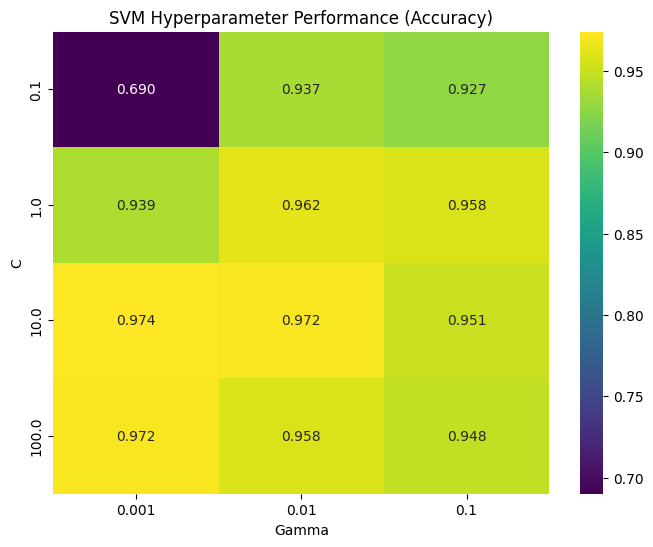

In [6]:
# do write code
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 그리드 서치 결과 추출
results = pd.DataFrame(grid_pipe.cv_results_)

# 2. 필요한 컬럼만 선택 (파라미터값, 평균 점수)
# param_svm__C, param_svm__gamma, mean_test_score
pivot_table = results.pivot(index='param_svm__C',
                            columns='param_svm__gamma',
                            values='mean_test_score')

# 3. 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='.3f')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('SVM Hyperparameter Performance (Accuracy)')
plt.show()